In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Extract ZIP file
zip_path = "/content/train.zip"  # Change to your file path
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")



Dataset extracted successfully.


Data preprocessing complete.
Training set: (23031, 48, 48, 1), Testing set: (5758, 48, 48, 1)


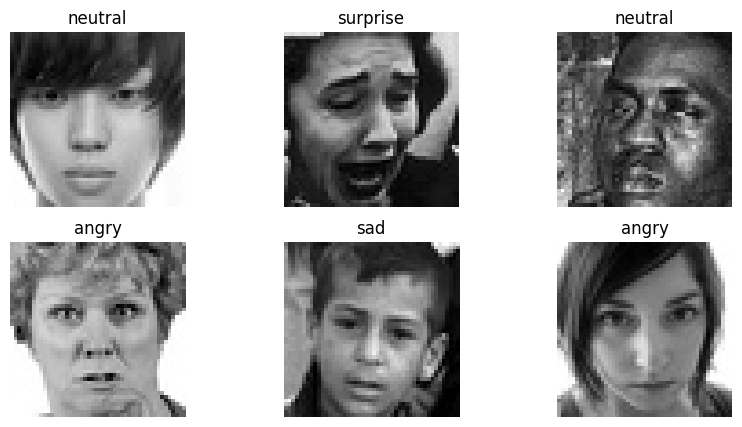

In [ ]:
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define paths

extract_path = "/content/dataset/train"


# Step 2: Define expression labels based on folder names
expression_labels = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "sad": 4,
    "surprise": 5,
    "neutral": 6
}

# Step 3: Load and preprocess images
X, y = [], []

for expression, label in expression_labels.items():
    folder_path = os.path.join(extract_path, expression)  # Path to expression folder
    if not os.path.exists(folder_path):
        print(f"Warning: {folder_path} does not exist. Skipping...")
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is None:
            continue  # Skip if image is unreadable

        img = cv2.resize(img, (48, 48))  # Resize to 48x48
        X.append(img)
        y.append(label)

# Convert lists to NumPy arrays
X = np.array(X, dtype="float32") / 255.0  # Normalize pixel values (0-1)
X = X.reshape(-1, 48, 48, 1)  # Reshape for CNN input
y = np.array(y)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=7)

# Step 4: Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

# Step 5: Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i].reshape(48, 48), cmap="gray")
    plt.title(list(expression_labels.keys())[np.argmax(y_train[i])])
    plt.axis("off")
plt.show()


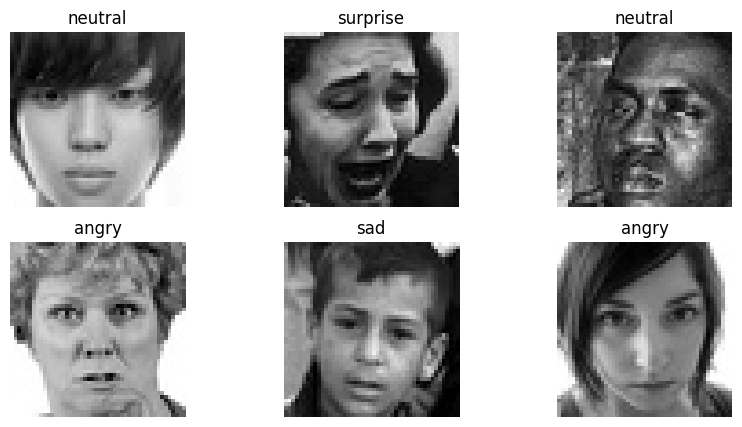

In [ ]:
# Step 5: Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i].reshape(48, 48), cmap="gray")
    plt.title(list(expression_labels.keys())[np.argmax(y_train[i])])
    plt.axis("off")
plt.show()

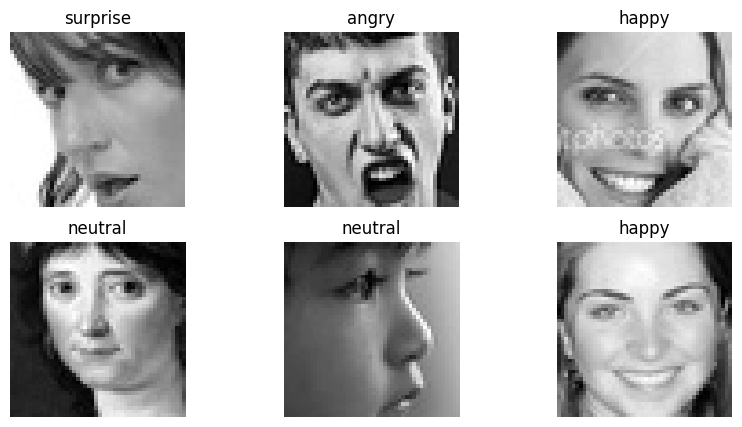

In [ ]:
import random

# Step 5: Visualize random sample images
plt.figure(figsize=(10, 5))
random_indices = random.sample(range(len(X_train)), 6)  # Pick 6 random indices

for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[idx].reshape(48, 48), cmap="gray")
    plt.title(list(expression_labels.keys())[np.argmax(y_train[idx])])
    plt.axis("off")

plt.show()

Dataset Information:
Total images: 28789
Shape of X: (28789, 48, 48, 1)
Shape of y: (28789, 7)


<ipython-input-5-295e338d9764>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion Name", data=df, palette="coolwarm", order=expression_labels.keys())


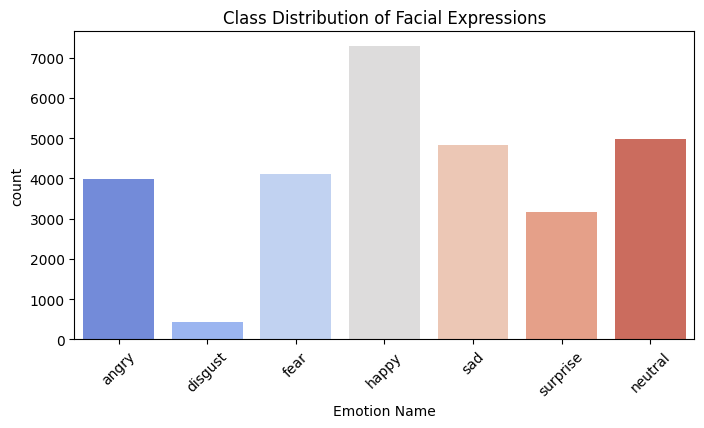

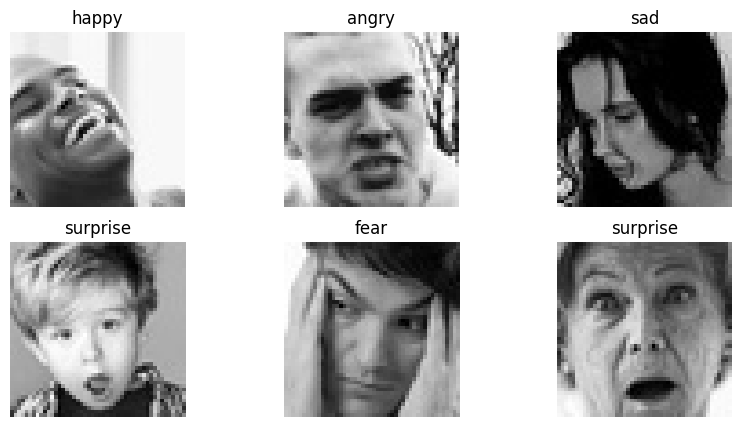

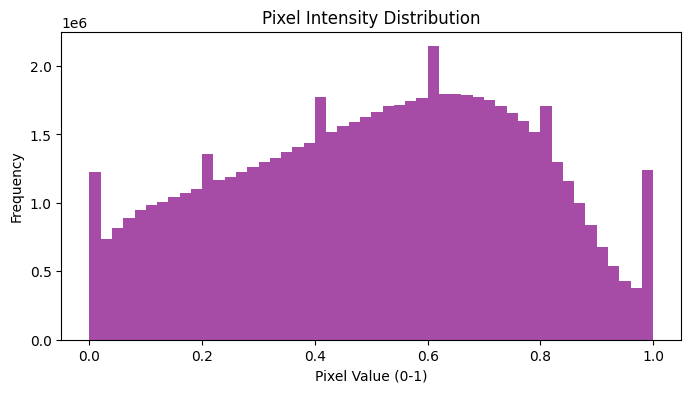

In [ ]:
import seaborn as sns
import pandas as pd

# 1️⃣ Print dataset details
print("Dataset Information:")
print(f"Total images: {len(X)}")
print(f"Shape of X: {X.shape}")  # Should be (num_samples, 48, 48, 1)
print(f"Shape of y: {y.shape}")  # Should be (num_samples, 7)

# Convert one-hot labels back to category indices for visualization
y_labels = np.argmax(y, axis=1)

# Create a Pandas DataFrame for analysis
df = pd.DataFrame({"Emotion": y_labels})
df["Emotion Name"] = df["Emotion"].map({v: k for k, v in expression_labels.items()})

# 2️⃣ Plot class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="Emotion Name", data=df, palette="coolwarm", order=expression_labels.keys())
plt.title("Class Distribution of Facial Expressions")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Visualize sample images with labels
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    idx = np.random.randint(len(X))  # Pick random index
    plt.imshow(X[idx].reshape(48, 48), cmap="gray")
    plt.title(df.iloc[idx]["Emotion Name"])
    plt.axis("off")

plt.show()

# 4️⃣ Check pixel intensity distribution
plt.figure(figsize=(8, 4))
plt.hist(X.flatten(), bins=50, color="purple", alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value (0-1)")
plt.ylabel("Frequency")
plt.show()


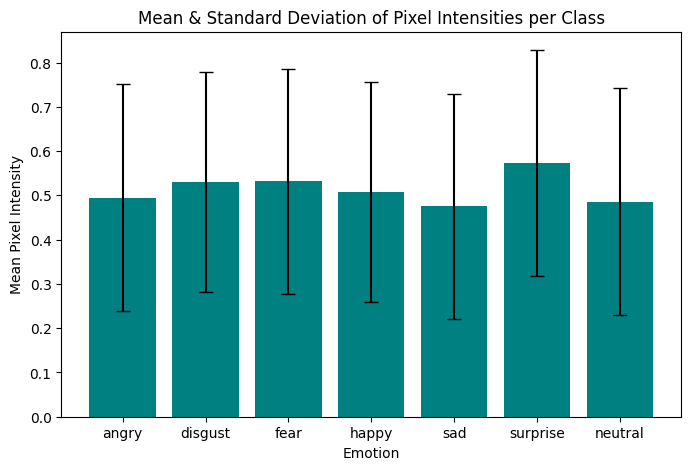

In [ ]:
# Compute mean & standard deviation of pixel values
means = [np.mean(X[y_labels == i]) for i in range(7)]
stds = [np.std(X[y_labels == i]) for i in range(7)]

# Plot mean pixel values per class
plt.figure(figsize=(8, 5))
plt.bar(expression_labels.keys(), means, yerr=stds, capsize=5, color="teal")
plt.xlabel("Emotion")
plt.ylabel("Mean Pixel Intensity")
plt.title("Mean & Standard Deviation of Pixel Intensities per Class")
plt.show()


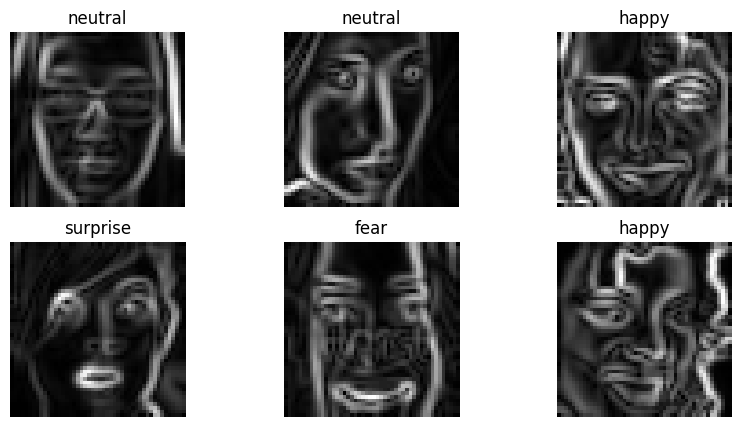

In [ ]:
def sobel_edge_detection(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction
    return np.sqrt(sobelx**2 + sobely**2)

# Apply edge detection to first 6 images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    idx = np.random.randint(len(X))
    edge_img = sobel_edge_detection(X[idx].reshape(48, 48))
    plt.imshow(edge_img, cmap="gray")
    plt.title(df.iloc[idx]["Emotion Name"])
    plt.axis("off")

plt.show()


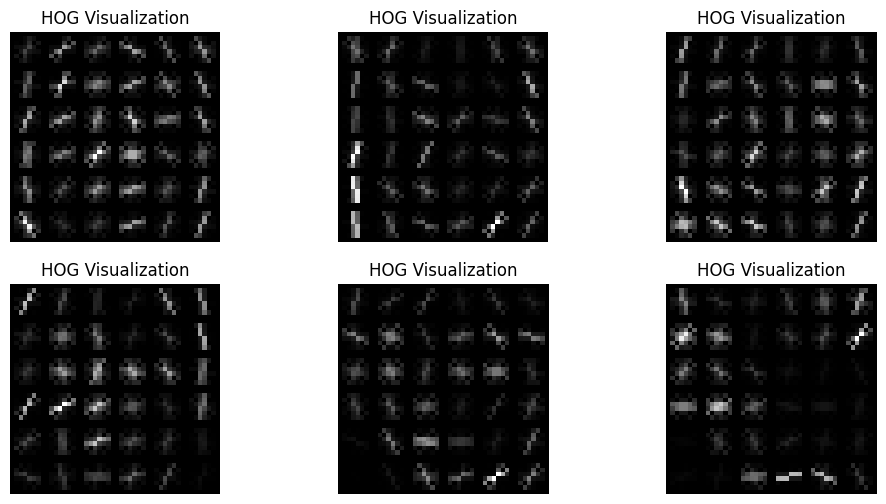

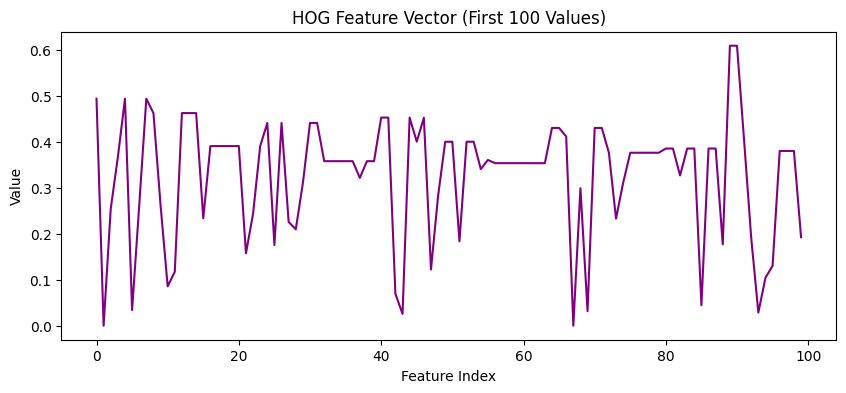

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Function to extract HOG features and visualization
def extract_hog_features(img):
    features, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8),
                              cells_per_block=(1, 1), visualize=True)
    return features, hog_image

# Apply HOG to first 6 images
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    idx = np.random.randint(len(X))  # Select random image
    img = X[idx].reshape(48, 48)  # Get original image (already grayscale)

    features, hog_img = extract_hog_features(img)  # Extract HOG
    plt.imshow(hog_img, cmap="gray")  # Show HOG visualization
    plt.title("HOG Visualization")
    plt.axis("off")

plt.show()

# Plot HOG features as a histogram
plt.figure(figsize=(10, 4))
plt.plot(features[:100], color="purple")  # Plot first 100 HOG features
plt.title("HOG Feature Vector (First 100 Values)")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()


Epoch 1/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 237s 646ms/step - accuracy: 0.2523 - loss: 1.7964 - val_accuracy: 0.3821 - val_loss: 1.5781
Epoch 2/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 259s 640ms/step - accuracy: 0.4214 - loss: 1.5051 - val_accuracy: 0.4575 - val_loss: 1.4147
Epoch 3/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 257s 627ms/step - accuracy: 0.4903 - loss: 1.3304 - val_accuracy: 0.5115 - val_loss: 1.2856
Epoch 4/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 221s 614ms/step - accuracy: 0.5335 - loss: 1.2319 - val_accuracy: 0.5337 - val_loss: 1.2270
Epoch 5/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 221s 614ms/step - accuracy: 0.5654 - loss: 1.1519 - val_accuracy: 0.5474 - val_loss: 1.2012
Epoch 6/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 226s 627ms/step - accuracy: 0.5810 - loss: 1.0957 - val_accuracy: 0.5533 - val_loss: 1.1923
Epoch 7/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 257s 612ms/step - accuracy: 0.6211 - loss: 1.0085 - val_accuracy: 0.5630 - val_loss: 1.1800
Epoch 8/25
360/360 ━━━━━━━━━━━━━━━━━━━━ 264s 618ms/step - accuracy: 0.6483 -

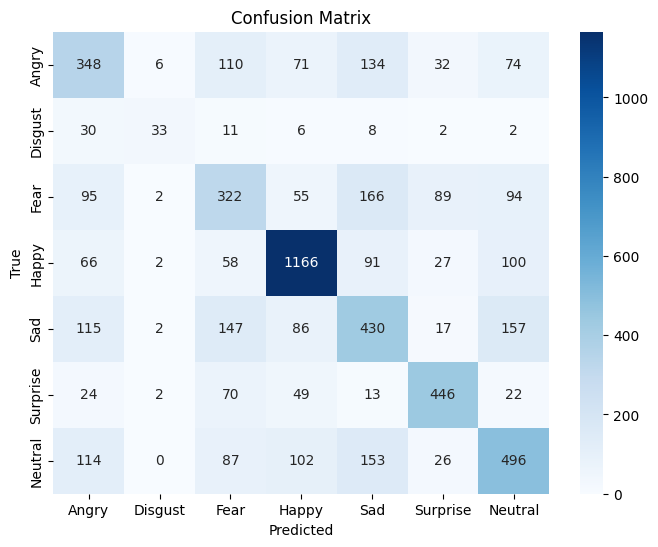

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load preprocessed data
# Assume X_train, X_test, y_train, y_test are already prepared

# Ensure labels are in integer format
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Model Architecture
def build_model():
    model = keras.Sequential([
        keras.Input(shape=(48, 48, 1)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(256, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(7, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build model
model = build_model()

# Train model
epochs = 25  # Adjust based on needs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], yticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()